## K-Nearest Neighbors Multi Classification-Object Detection For Fruits

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [17]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
# Colour scale is a 0 to 1 scale encompassing VIBGYOR colours.

# You want to know all possible unique values:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

# Create a dictionary with pairs of label and name for ease of understanding.
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

**In Python, there are several ways and functions to show a grid of scatterplots to visualize relationships between pairs of variables in a dataset. Some of the common methods include using libraries such as Matplotlib, Seaborn, and Pandas. Here are a few ways:**

from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='hist')
-----------------------------
import seaborn as sns
sns.pairplot(df)
-----------------------------
import seaborn as sns
sns.scatterplot_matrix(df, alpha=0.2, figsize=(8, 8))
-----------------------------
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='hist')


### Examining the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

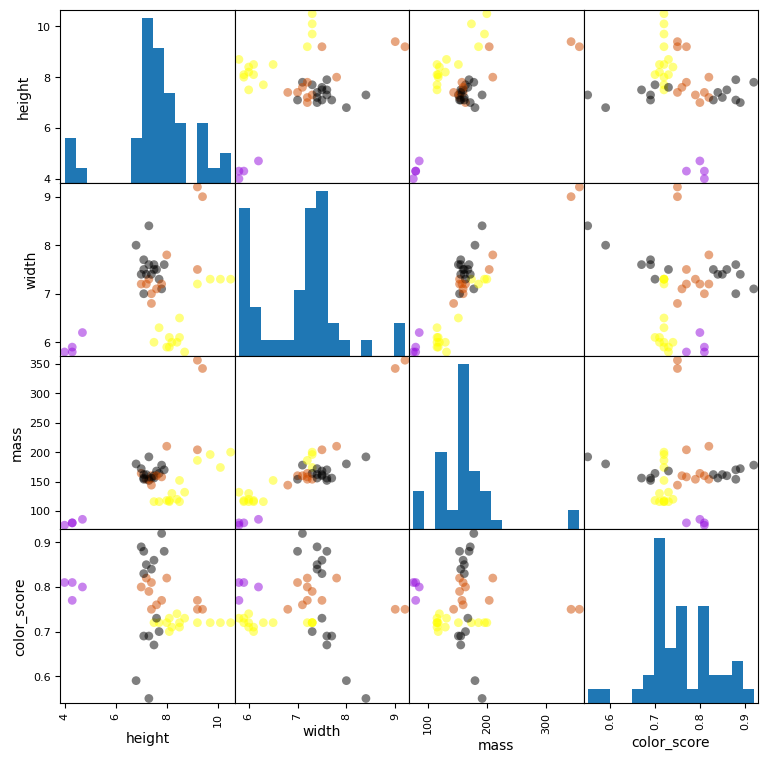

In [27]:
%matplotlib inline

# plotting a scatter matrix
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']


# Split given data into 2 sets. One for training and one for testing. Using the same data for training and testing doesn't tell you anything new.
# A 75%-25% split is quite standard.
# random_state provides the seed value to the internal random number generator. Providing the same value every time generates the same random number every time.
# X holds data, y holds label values.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = plt.get_cmap('gnuplot')
# cmap = cm.gnuplot

scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
plt.show()



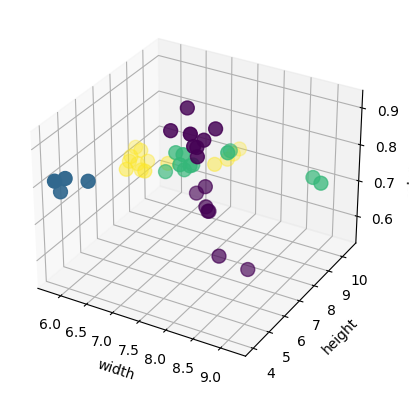

In [31]:
%matplotlib inline

# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [35]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
# random_state is set to 0 so that we get the same answer as the instructor. Normally it's assigned randomly.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_train


42    3
48    4
7     2
14    1
32    3
49    4
29    3
37    3
56    4
18    1
55    4
27    3
15    1
5     2
31    3
16    1
50    4
20    1
51    4
8     1
13    1
25    3
17    1
58    4
57    4
52    4
38    3
1     1
12    1
45    4
24    3
6     2
23    1
36    3
21    1
19    1
9     1
39    3
54    4
3     2
0     1
53    4
47    4
44    4
Name: fruit_label, dtype: int64

### Create classifier object

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [41]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [42]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [46]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names*")

fruit_prediction = knn.predict([[20, 4.3, 5.5]])
print(fruit_prediction[0])

print(lookup_fruit_name[fruit_prediction[0]])

2
mandarin


In [47]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

In [ ]:
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

def custom_weights(distances):
    # Some custom weighting logic
    return 1 / distances

# light red (#FFAAAA), light green (#AAFFAA), light blue (#AAAAFF), and light gray (#AFAFAF).
# red (#FF0000), green (#00FF00), blue (#0000FF), and gray (#AFAFAF).

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

# Here are the possible values for the weights parameter:
# 'uniform' (default):
# All points in each neighborhood are weighted equally.
# This means that each neighbor contributes equally to the prediction.

# 'distance':
# Weight points by the inverse of their distance.
# Closer neighbors will have a greater influence than farther neighbors.
# This is useful when you want closer points to have a higher impact on the prediction.

# 'Custom Weighting Function':
# You can also provide a custom weighting function.
# This function takes an array of distances and returns an array of the same shape representing the weights.

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1

    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])


    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')

    plt.show()

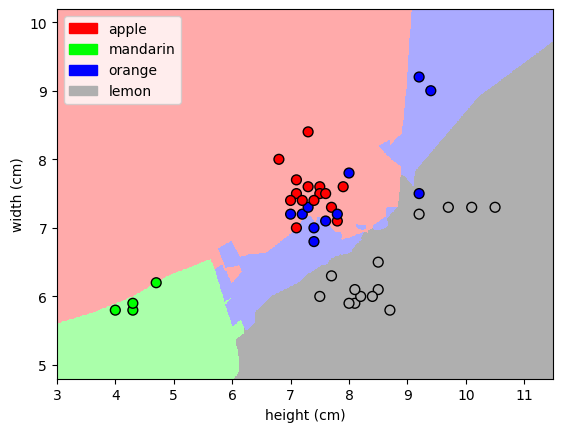

In [51]:
from adspy_shared_utilitiesz import plot_fruit_knn

# uniform is the weighting method to treat all points equally. You can use 'distance' to use a distance weighted method.
plot_fruit_knn(X_train, y_train, 10, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

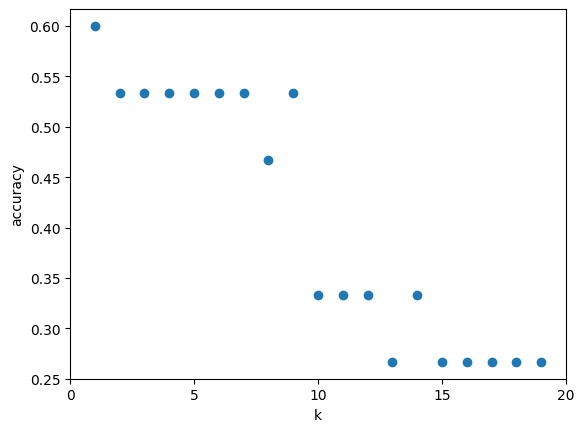

In [52]:
# Larger values of k give lower accuracy FOR THIS DATA SET and for ONE TRAIN TEST SPLIT. This is not true for all cases!

k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


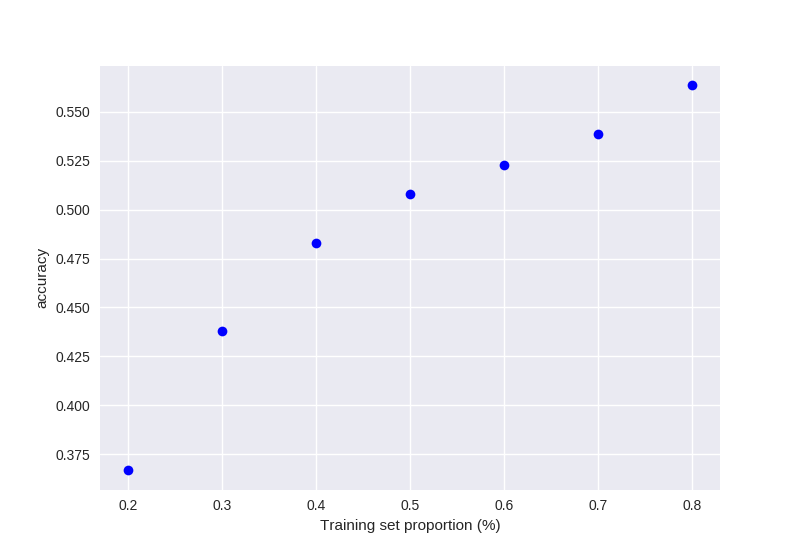

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000): # Run a 1000 tests for each combination of proportion and then average the accuracy score for plotting.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');